In [6]:
#Importing Libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [7]:
#Reading required Covid-19 csv file
cov19 = pd.read_csv("Datasets/Covid19_Confirmed_dataset.csv")
cov19.head(7)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428


In [8]:
cov19.shape

(266, 104)

In [9]:
#Deleteing useless columns
useless_columns = ["Lat", "Long"]
cov19.drop(useless_columns, axis = 1, inplace = True)
cov19.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [10]:
#Aggregating rows by Countries
cov19Agg = cov19.groupby("Country/Region").sum()
cov19Agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [11]:
cov19Agg.shape

(187, 100)

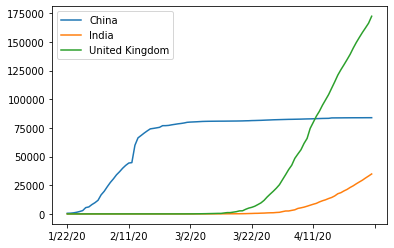

In [12]:
#Checking visualizations
cov19Agg.loc["China"].plot()
cov19Agg.loc["India"].plot()
cov19Agg.loc["United Kingdom"].plot()
plt.legend()

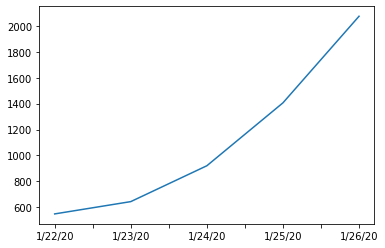

In [13]:
#Since China had a large spike in the initial stages, we check initial days of China
cov19Agg.loc["China"][:5].plot()

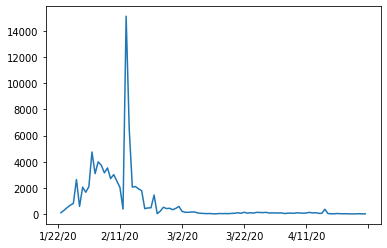

In [14]:
#Calculating Slope using 1st derivative
cov19Agg.loc["China"].diff().plot()

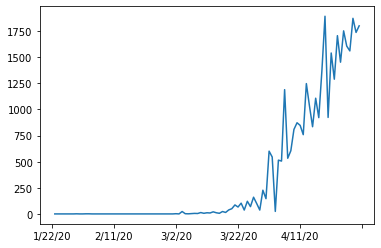

In [15]:
#Checking the same for India
cov19Agg.loc["India"].diff().plot()

In [19]:
#Above plots show New Infections after every 24hour interval
#We find max new cases in a day to find MAXIMUM INFECTION RATE
#Compare Max infection rate of 3 countries and make a list
inf_list = [cov19Agg.loc["China"].diff().max(), cov19Agg.loc["India"].diff().max(), cov19Agg.loc["United Kingdom"].diff().max()]
inf_list

[15136.0, 1893.0, 8733.0]

In [20]:
#Similarly, we find Maximum Infection Rates of all countries and add a column to cov19Agg dataframe
countries =list(cov19Agg.index)
max_inf_r = []
for c in countries:
    max_inf_r.append(cov19Agg.loc[c].diff().max())
cov19Agg["max_infection_rate"] = max_inf_r
cov19Agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [22]:
#Make a new dataframe with only countries and Infection Rates
cov19data = pd.DataFrame(cov19Agg["max_infection_rate"])
cov19data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [26]:
# Reading required Hapiness Index csv file
HapRepCSV = pd.read_csv("datasets/worldwide_happiness_report.csv")
HapRepCSV.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [27]:
#Dropping useless columns and changing indexing to make merging with cov19data possible
useless = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]
HapRepCSV.drop(useless, axis = 1, inplace = True)
HapRepCSV.set_index("Country or region", inplace = True)
HapRepCSV.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [29]:
#Comparing shapes of cov19data and HapRepCSV DataFrames for merging analysis
shapes = [cov19data.shape, HapRepCSV.shape]
shapes

[(187, 1), (156, 4)]

In [30]:
#Due to varying Row-sizes, we use inner-merging
data = cov19data.join(HapRepCSV, how = "inner")
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [31]:
# Form Correlation Matrix to see which attributes contribute to maximum relations
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


In [32]:
# VISUALIZATIONS

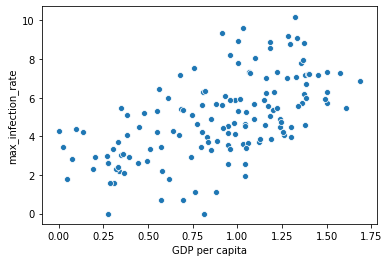

In [37]:
# Plotting GDP vs maximum Infection rate
#we use log(y) as y axis has to be downscaled for better graph plot understandability
x = data["GDP per capita"]
y = data["max_infection_rate"]
sns.scatterplot(x, np.log(y))

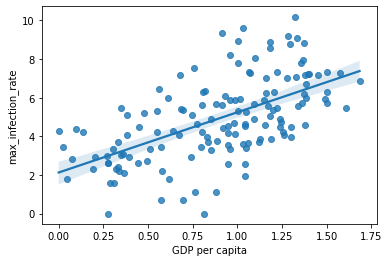

In [38]:
sns.regplot(x, np.log(y))

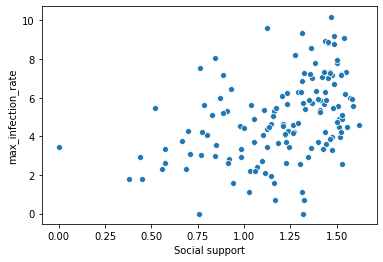

In [39]:
# Plotting Social support vs maximum Infection rate

x = data["Social support"]
y = data["max_infection_rate"]
sns.scatterplot(x, np.log(y))

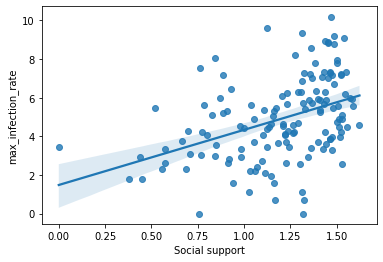

In [40]:
sns.regplot(x, np.log(y))

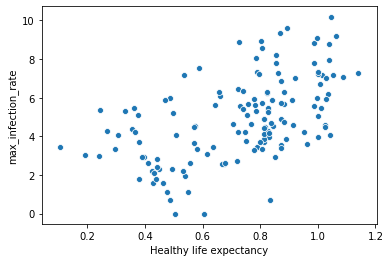

In [41]:
# Plotting Healthy life expectancy vs maximum Infection rate
x = data["Healthy life expectancy"]
y = data["max_infection_rate"]
sns.scatterplot(x, np.log(y))

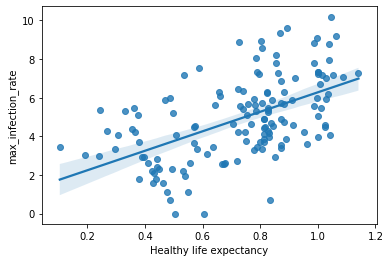

In [42]:
sns.regplot(x, np.log(y))

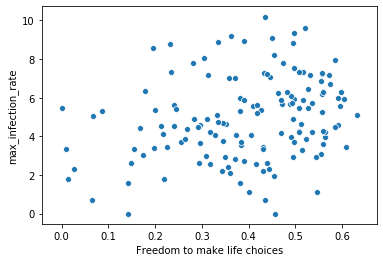

In [43]:
# Plotting Freedom to make life choices vs maximum Infection rate
x = data["Freedom to make life choices"]
y = data["max_infection_rate"]
sns.scatterplot(x, np.log(y))

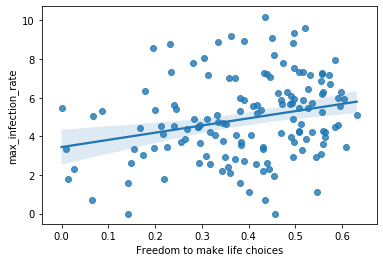

In [44]:
sns.regplot(x, np.log(y))